# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("bank.csv")

# Check the data. Check shape, data type, and info

In [3]:
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [4]:
data_df.isnull().sum()

Bank                   0
DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

In [5]:
data_df.shape

(515, 6)

In [6]:
data_df.dtypes

Bank                   int64
DD                     int64
Withdrawals            int64
Deposits               int64
Branch Area in sqft    int64
avg daily walkins      int64
dtype: object

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
Bank                   515 non-null int64
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(6)
memory usage: 24.3 KB


# Checking Summary Statistic

In [8]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bank,515.0,258.000000,148.811962,1.0,129.5,258.0,386.5,515.0
DD,515.0,232.252427,66.648815,120.0,169.5,237.0,291.0,350.0
Withdrawals,515.0,150.693204,56.897777,10.0,103.0,152.0,200.0,247.0
Deposits,515.0,81.687379,28.596912,33.0,58.0,80.0,105.0,212.0
Branch Area in sqft,515.0,2934.669903,437.062831,1200.0,2675.0,2960.0,3300.0,3650.0
avg daily walkins,515.0,598.603883,83.487891,380.0,537.5,601.0,657.5,838.0


# Checking for Duplicates

In [9]:
data_df1=data_df[data_df.duplicated()]
data_df1 ## No duplicates within dataset

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins


# Scaling the data

In [10]:
# importing the StandardScaler Module

from sklearn.preprocessing import StandardScaler

In [11]:
# Creating an object for the StandardScaler function

scaler = StandardScaler()

In [14]:
scaled=scaler.fit_transform(data_df)
data_df_scaled=pd.DataFrame(scaled,columns = list(data_df))
# Bank attribute is like unique number and will not have any significance. Hence removing it.
data_df_scaled.pop('Bank') 
data_df_scaled.head()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039


# Creating Clusters using KMeans

In [15]:
from sklearn.cluster import KMeans

### Build a KMeans model having 2 Clusters

In [16]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans( 2, random_state=10, )


In [17]:
# Fit K means on the scaled_df

k_means.fit(data_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

### Check cluster Output for all the observations

In [18]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

### Calculate within Cluster Sum of Squares

In [19]:
k_means.inertia_ ## WCSS for cluster = 2

1943.5103361838687

### Form clusters with K = 1,3,4,5,6 and compare the WSS ( within cluster sum of squares)

In [21]:
cluster_range = range( 1,7)
wcss=[]
for num_clusters in cluster_range:
    kmeans = KMeans(num_clusters, random_state = 10)
    kmeans.fit(data_df_scaled)
    labels = kmeans.labels_                     # capture the cluster lables
    centroids = kmeans.cluster_centers_         # capture the centroids    
    wcss.append(kmeans.inertia_)


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors(WSS)": wcss} )
clusters_df[0:6]


,num_clusters,cluster_errors(WSS)
0,1,2575.000000
1,2,1943.510336
2,3,1593.896066
3,4,1375.404517
4,5,1219.948635
5,6,1121.784729


### Calculate WSS for other values of K ( can use range of K = 1 to 20) - Elbow Method

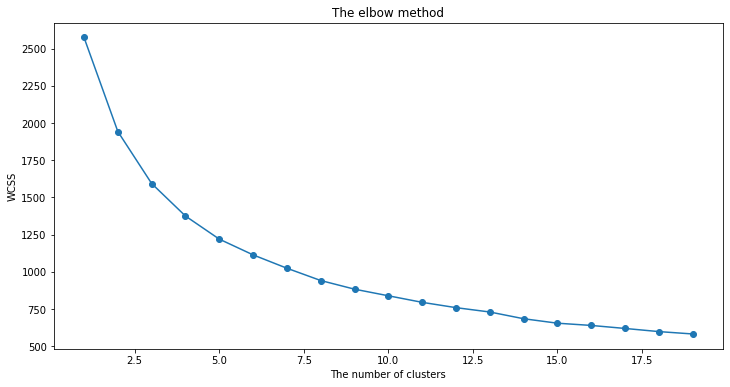

In [22]:
wcss = []
cluster_range = range( 1,20)  
for num_clusters in cluster_range:
    kmeans = KMeans(num_clusters, n_init = 10, random_state = 0)
    kmeans.fit(data_df_scaled)
    labels = kmeans.labels_                     # capture the cluster lables
    centroids = kmeans.cluster_centers_         # capture the centroids    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,20), wcss,marker = "o")
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

## Build a KMeans model with K=3

In [23]:


# Number of clusters

kmeans = KMeans(n_clusters=3,random_state=10)

# Fitting the input data

kmeans = kmeans.fit(data_df_scaled)

# Getting the cluster labels

labels = kmeans.predict(data_df_scaled)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn



Centroid values
sklearn
[[ 0.35832417  0.81308703  0.24410023 -0.58770463  0.92047529]
 [-1.08351856 -0.11198521 -0.04719763  0.21399278 -0.93272944]
 [ 0.80559769 -0.80084989 -0.22521557  0.42981084 -0.00374963]]


### Use silhouette score to evaluate the above model ( 3 clusters)

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.21979497658305341


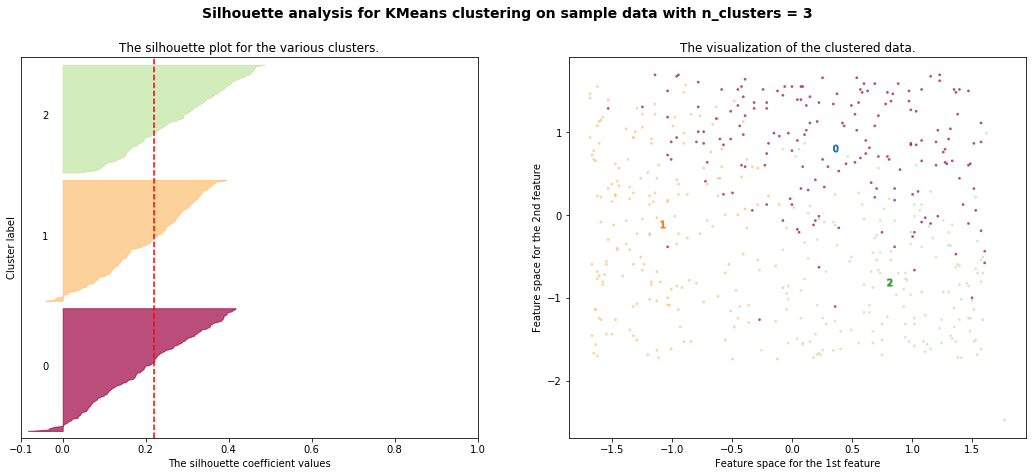

In [24]:
## from __future__ import print_function
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from data set
X=data_df_scaled.values

range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Build a KMeans model with K=4

### Use silhouette score to evaluate the above model ( 4 clusters)

Automatically created module for IPython interactive environment
For n_clusters = 4 The average silhouette_score is : 0.22705908803626518


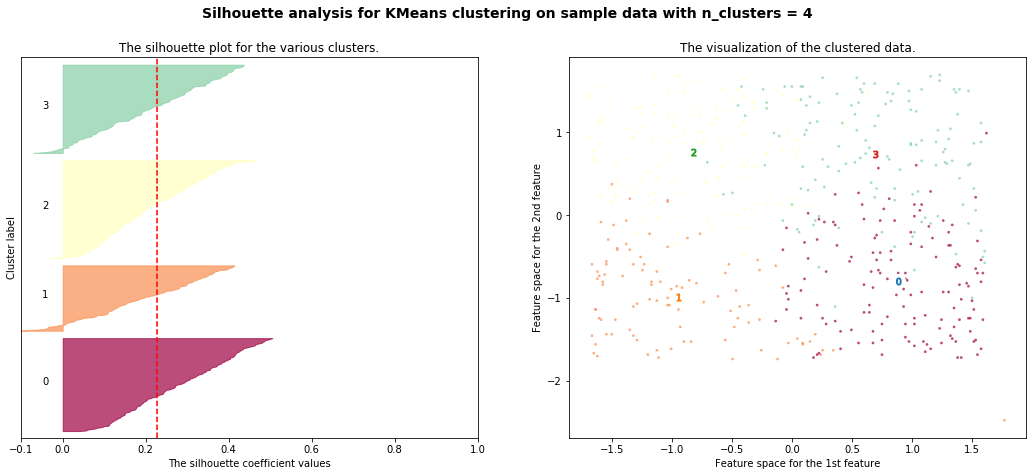

In [25]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=data_df_scaled.values

range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Appending Clusters to the original dataset

# Cluster Profiling

In [26]:
kmeans = KMeans(n_clusters=4, random_state=10)

In [27]:
kmeans.fit(data_df_scaled)
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data_df_scaled) )

In [28]:
centroid_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,0.880578,-0.800059,-0.315918,0.414727,0.033386
1,-0.950270,-0.987859,0.555272,0.143194,-1.225024
2,-0.826831,0.761873,-0.303124,0.195739,-0.237339
3,0.692754,0.733219,0.255697,-0.759529,1.136842


In [29]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['Clus_kmeans4'] = df_labels['labels'].astype('category')

In [30]:
data_df_labeled = data_df_scaled.join(df_labels)

In [31]:
data_df_labeled

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,labels,Clus_kmeans4
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326,3,3
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528,1,1
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009,3,3
3,0.281562,-0.680709,1.656075,1.638267,0.292496,0,0
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039,1,1
...,...,...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745,3,3
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458,2,2
512,1.513088,-1.138113,0.921016,-0.193913,0.927935,0,0
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257,2,2


In [32]:
data_df_labeled.Clus_kmeans4.value_counts().sort_index()

0    139
1     98
2    146
3    132
Name: Clus_kmeans4, dtype: int64

In [34]:
# since bank attribute is already removed not required now
clust_profile=data_df_labeled

In [35]:
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()

In [36]:
clust_profile['freq']=data_df_labeled.Clus_kmeans4.value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,labels,freq
Clus_kmeans4,,,,,,,
0,0.880578,-0.800059,-0.315918,0.414727,0.033386,0,139
1,-0.950270,-0.987859,0.555272,0.143194,-1.225024,1,98
2,-0.826831,0.761873,-0.303124,0.195739,-0.237339,2,146
3,0.692754,0.733219,0.255697,-0.759529,1.136842,3,132


# Mention your insights

- Cluster 3: Small size bank with less deposit but highest walkins and Withdrawals, and large DD
- Cluster 2: Medium size bank with less walkins and deposits and high withdrawals
- Cluster 1: Medium size bank with less withdrawal,walkin, DD but highest Deposit
- Cluster 0: Large size bank with more number of walkins and highest DD, but less Deposits